In [1]:
# import libraries
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

In [2]:
# read the dataframe
df = pd.read_csv('../data/Addis_Ababa_Solcast_clean.csv')

In [3]:
df

,date,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Sunrise,Sunset,Month
0,2018-12-31,18.338462,3.800000,76.769231,710.615385,519.384615,10.330769,46.215385,783.176923,81.692308,4.269231,0,19,12
1,2019-01-01,18.069231,0.284615,54.846154,792.000000,535.769231,9.546154,38.976923,783.884615,87.846154,3.069231,0,19,1
2,2019-01-02,19.292308,0.738462,57.769231,767.615385,527.153846,14.030769,38.915385,783.661538,90.307692,2.615385,0,19,1
3,2019-01-03,19.423077,4.692308,67.076923,700.846154,513.692308,17.869231,49.015385,783.930769,77.153846,4.169231,0,19,1
4,2019-01-04,17.607692,0.438462,49.307692,825.076923,547.461538,6.784615,37.961538,784.176923,71.769231,5.600000,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2021-12-21,18.415385,8.184615,130.923077,565.461538,482.692308,12.484615,50.684615,766.307692,103.076923,4.815385,0,19,12
1087,2021-12-22,17.976923,11.784615,153.000000,509.923077,470.692308,12.530769,50.184615,765.784615,104.461538,4.307692,0,19,12
1088,2021-12-23,18.538462,2.915385,70.769231,707.846154,513.615385,14.223077,47.569231,764.830769,106.384615,4.269231,0,19,12
1089,2021-12-24,18.892308,24.146154,212.538462,341.846154,426.000000,11.484615,34.430769,764.638462,122.076923,2.769231,0,19,12


### Dataset description

In [4]:
df.describe()

,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Sunrise,Sunset,Month
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0,1091.000000,1091.000000
mean,18.493989,26.644345,183.438941,365.988560,440.268079,18.164477,54.012827,767.470953,132.717026,2.722902,0.0,18.813932,6.496792
std,2.110614,20.538622,71.920464,260.127691,117.353163,5.537724,17.004875,6.157765,50.313153,1.007324,0.0,0.389340,3.438415
min,12.992308,0.000000,46.153846,0.000000,102.692308,3.769231,11.569231,762.546154,38.307692,0.623077,0.0,18.000000,1.000000
25%,17.064103,7.003846,123.346154,144.346154,356.000000,14.075000,40.457692,764.546154,95.923077,1.959936,0.0,19.000000,4.000000
50%,18.069231,24.392308,196.307692,322.153846,453.076923,18.646154,53.483333,765.161538,115.384615,2.584615,0.0,19.000000,7.000000
75%,19.915385,41.608974,239.153846,610.730769,541.583333,23.096154,68.742308,765.924038,157.500000,3.415705,0.0,19.000000,9.000000
max,25.046154,82.553846,346.666667,875.166667,635.692308,27.223077,92.261538,784.638462,317.538462,6.115385,0.0,19.000000,12.000000


### Total radiation per month

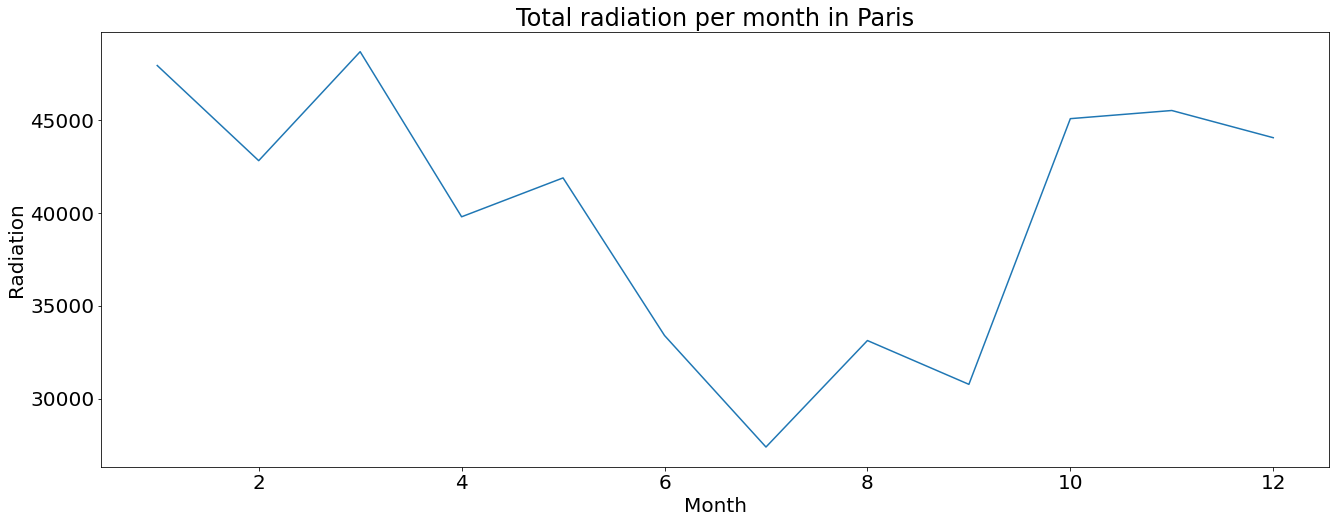

In [5]:
df['Month'] = pd.to_datetime(df['date']).dt.month
df_rad_per_month = df[['Radiation', 'Month']].groupby('Month').sum()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="Month", y="Radiation", data=df_rad_per_month, ax=ax)
ax.set_title('Total radiation per month in Paris');

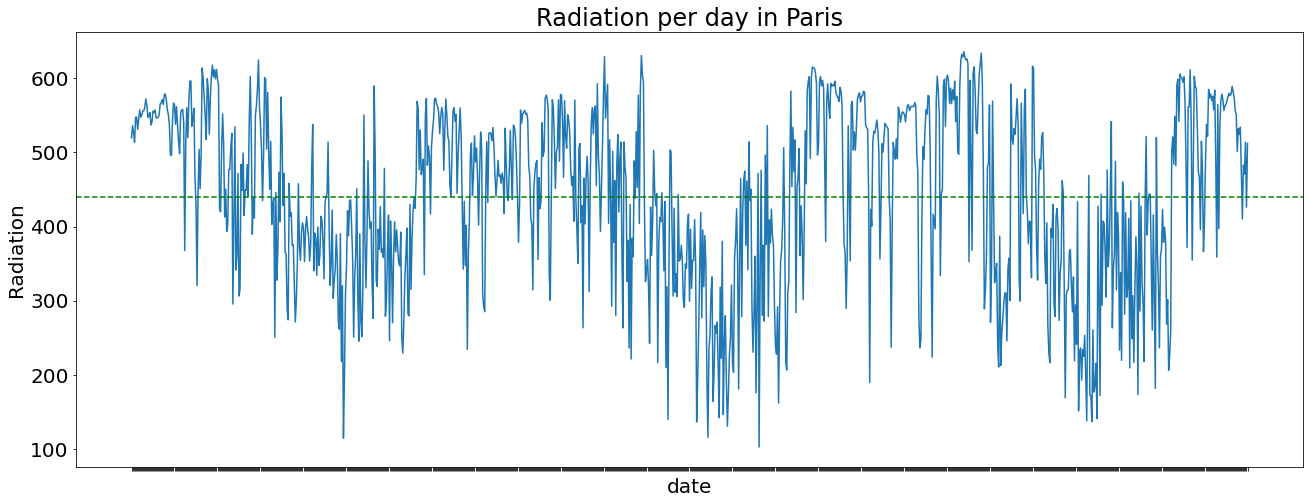

In [6]:
## Daily solar radiation plot

rad_avg = df['Radiation'].mean()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="date", y="Radiation", data=df, ax=ax)
ax.set_title('Radiation per day in Paris');
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")
ax.set(xticklabels=[]);

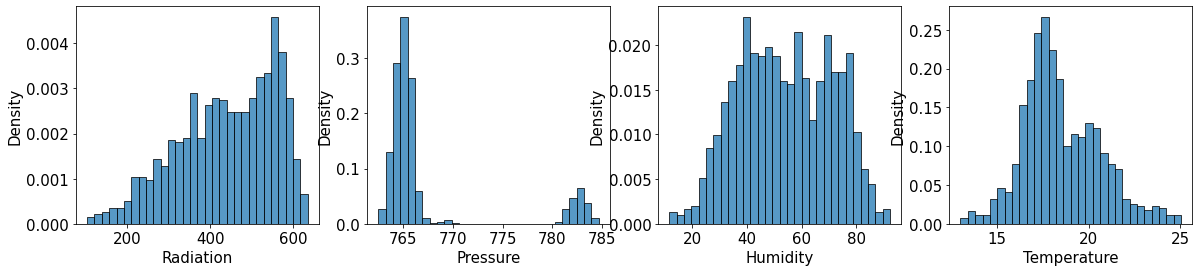

In [7]:
# Histogram distribution of weather features and solar irradiation
plt.rcParams['font.size'] = '15'
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(df['Radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(df['Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(df['Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(df['Temperature'], stat="density", bins=30, ax=ax[3])
plt.show()

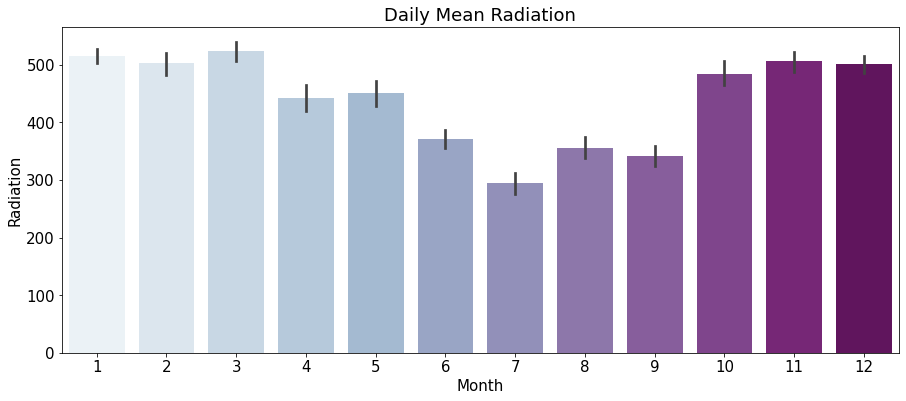

In [8]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Month", y='Radiation', data= df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

### Correlation plot

/tmp/ipykernel_380/853664678.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)


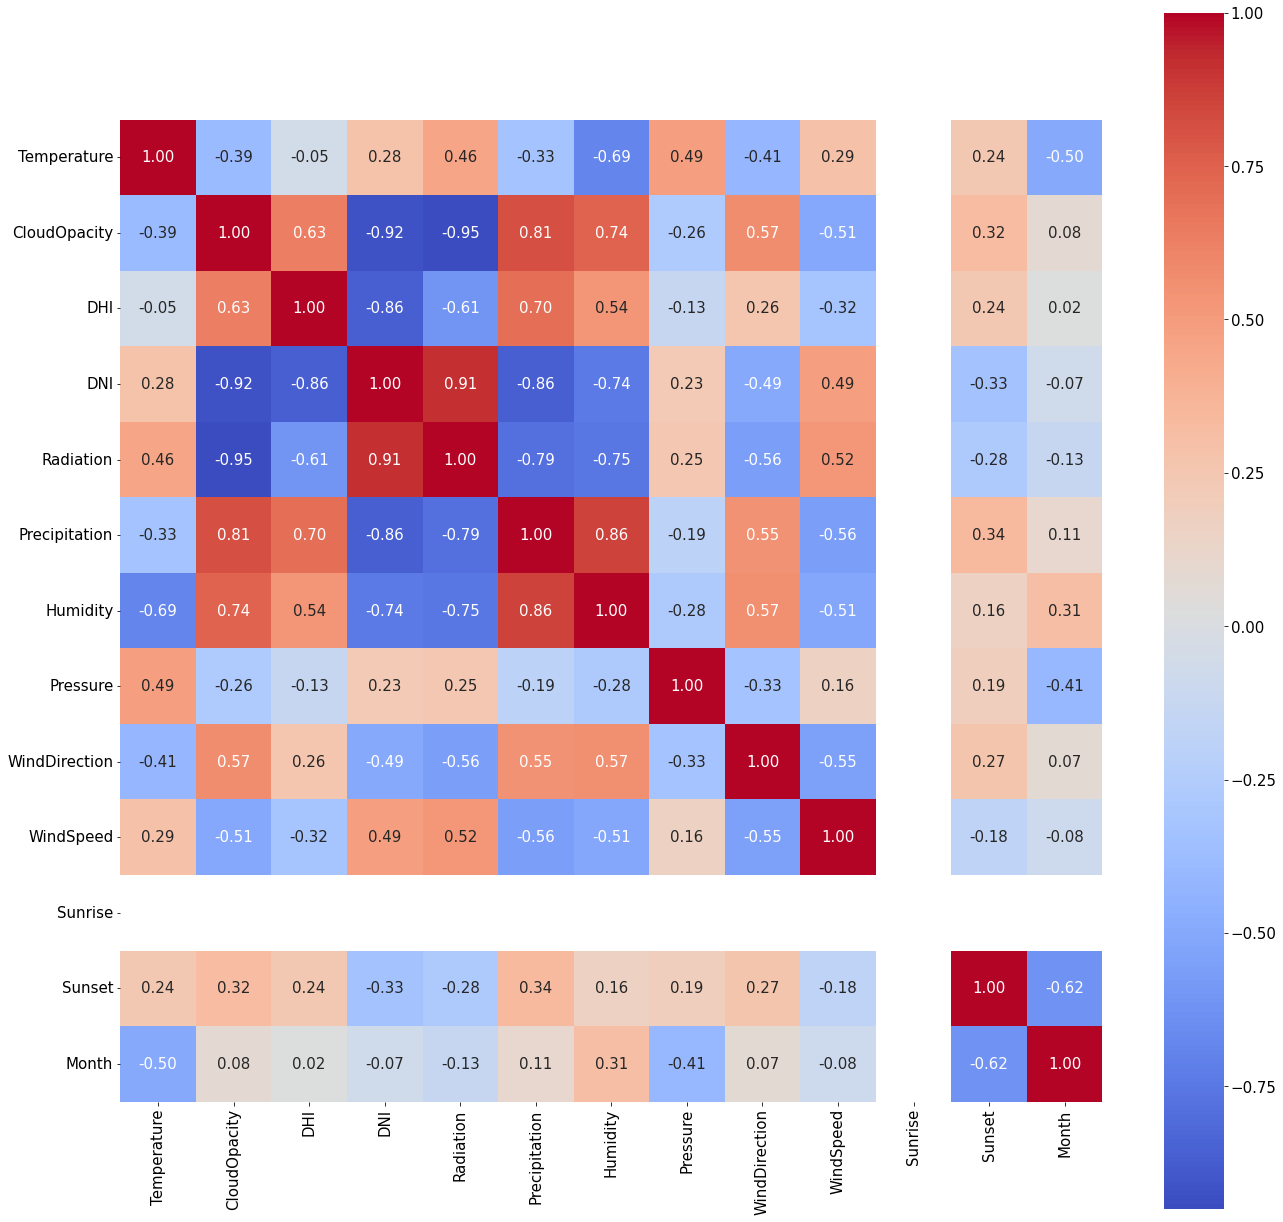

In [9]:
# feature correlation
corr= df.corr(method = "pearson")

fig, ax = plt.subplots(1, 1, figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

In [10]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = df['Radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -4.364990
p-value: 0.000342
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
